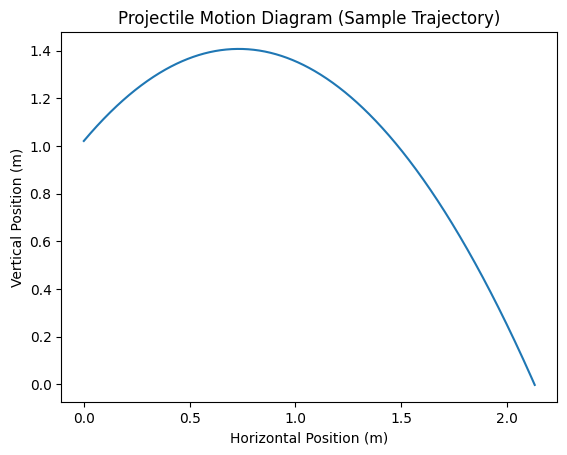

Nominal final horizontal position: 2.13 m
Mean final horizontal position: 2.15 m
Standard deviation of final horizontal position: 0.09 m


In [3]:
import numpy as np
from matplotlib import pyplot as plt

plt.close('all')

# Constants
g = 9.80
π = np.pi

# Nominal launch parameters
v0_nominal = 3.78  # m/s
theta_nominal = 45 * π / 180  # radians
y0_nominal = 1.026  # meters

# Uncertainty parameters (standard deviations)
v0_uncertainty = 0.1  # m/s
theta_uncertainty = 1 * π / 180  # radians
y0_uncertainty = 0.01  # meters

# Simulation parameters
num_simulations = 500
dt = 0.001

# Arrays to store the results
final_x = []

for _ in range(num_simulations):
    # Generate random values with uncertainties
    v0 = np.random.normal(v0_nominal, v0_uncertainty)
    theta = np.random.normal(theta_nominal, theta_uncertainty)
    y0 = np.random.normal(y0_nominal, y0_uncertainty)
    
    # Calculate initial velocity components
    vx = v0 * np.cos(theta)
    vy = v0 * np.sin(theta)
    
    # Initialize lists for positions and time
    x = [0.0]
    y = [y0]
    t = [0.0]
    
    # Loop to compute the projectile's trajectory
    while y[-1] > 0:
        ax = 0
        ay = -g
        x.append(x[-1] + vx * dt)
        vx = vx + ax * dt
        y.append(y[-1] + vy * dt)
        vy += ay * dt
        t.append(t[-1] + dt)
    
    # Store the final horizontal position
    final_x.append(x[-1])

# Calculate mean and standard deviation of the results
mean_x = np.mean(final_x)
std_x = np.std(final_x)

# Plot a sample trajectory (optional)
plt.plot(x, y)
plt.title('Projectile Motion Diagram (Sample Trajectory)')
plt.xlabel('Horizontal Position (m)')
plt.ylabel('Vertical Position (m)')
plt.show()

# Output the statistics
print(f"Nominal final horizontal position: {x[-1]:.2f} m")
print(f"Mean final horizontal position: {mean_x:.2f} m")
print(f"Standard deviation of final horizontal position: {std_x:.2f} m")


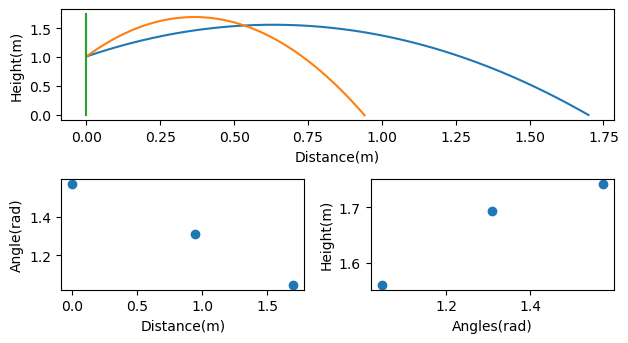

In [89]:
import numpy as np
import matplotlib.pyplot as plt

#constants
g = 9.80

#launch parameters
xo = 0.0
yo = 101.2 / 100
vo2 =  3.78
theta = 45 * np.pi/180

#set up variables

y = [yo]
x = [xo]
th = [theta]
vx = vo2*np.cos(th[-1])
vy = vo2*np.sin(th[-1])

# t, dt = np.linspace(0,10,10000, retstep = True) this determines a time range (in this case it is going to create a list
# from 0 to 10 with 10000 values inside. And then it is going to define dt as how much the time is changing in between values)

#define distance step
dt = 0.001

#create figure and defining variable to be able to plot 3 graphs in the same frame
fig = plt.figure()
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,2,3)
ax3 = fig.add_subplot(3,2,4)

#creating empty list to be able to plot Angle vs Height and Angle vs Distance graph
angles = []
ranges = []
heights = []

#Creating loops. One that changes the angle and the other one graphs how the ball behaves when launched with that angle
while th[-1] < 75 * np.pi/180:
    y = [yo]
    x = [xo]
    th.append(th[-1] + 15 * np.pi/180)
    vx = vo2*np.cos(th[-1])
    vy = vo2*np.sin(th[-1])
    angles.append(th[-1])
    
    while y[-1] > 0:
        ax = 0
        ay = -g
        x.append(x[-1] + vx * dt)
        vx+= ax * dt
        y.append(y[-1] + vy *dt)
        vy+= ay *dt
      
    ranges.append(x[-1])
    heights.append(max(y))
    
    #graphing inside the loop so that there are multiple lines (one per launch) inside the same graph
    ax1.plot(x,y)
    ax1.set_ylabel("Height(m)")
    ax1.set_xlabel("Distance(m)")
        
#creating angles vs distance graph
ax2.scatter(ranges,angles)
ax2.set_ylabel("Angle(rad)")
ax2.set_xlabel("Distance(m)")

#creating angle vs height graph
ax3.scatter(angles,heights)
ax3.set_ylabel("Height(m)")
ax3.set_xlabel("Angles(rad)")

#not too sure what this one does but everything looks prettier with it
plt.tight_layout()




standard deviation weight 108.2g
Mean 254.5g
standard deviation marbles 19.0


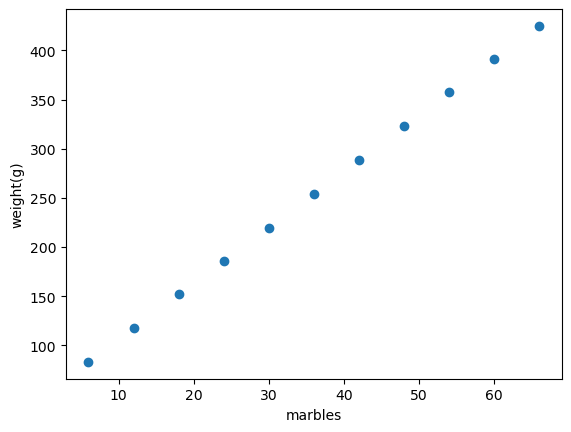

In [1]:
import numpy as np
import matplotlib.pyplot as plt

m = [6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66]
w = [83.2, 118.0, 152.5, 186.2, 219.7, 254.4, 288.7, 323.5, 357.5, 391.3, 425.0]
i = 0 

plt.xlabel('marbles')
plt.ylabel('weight(g)')
plt.scatter(m, w)

val = w[i]
valx = m[i]
#finding how many values I have on my list
n = len(w)

#finding the mean of each list
mean = sum(w)  / len(w)
meanx = sum(m)  / len(m)

#A list to hold in the values for the standard deviation equation
ts = []
tsx = []

#finding the value needed for the standard deviation equation, the inside part that needs to be sum
while i < 11:
    ts.append( (val- mean)**2 )
    val = w[i]
    i += 1

i = 0

while i < 11:
    tsx.append( (valx- meanx)**2 )
    valx = m[i]
    i += 1


#finding the standard deviation by using the previous gathered values, summing them and doing the rest of the equation
dev = (np.sqrt( 1/n * sum(ts)) )
devx = (np.sqrt( 1/n * sum(tsx)) )

#Output the values with two decimal points
print("standard deviation weight", f'{dev:1.1f}g')
print("Mean", f'{mean:1.1f}g')
print("standard deviation marbles", f'{devx:1.1f}')

Mean weight: 254.5 g
Standard deviation of weight: 108.1 g
Mean number of marbles: 36.0
Standard deviation of number of marbles: 19.0


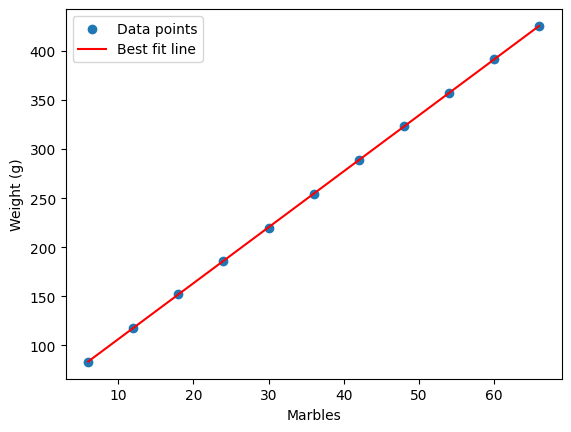

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data
m = [6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66]
w = [83.2, 118.0, 152.5, 186.2, 219.7, 254.4, 288.7, 323.5, 357.5, 391.3, 425.0]

# Plot the data
plt.xlabel('Marbles')
plt.ylabel('Weight (g)')
plt.scatter(m, w, label='Data points')

# Calculate mean and standard deviation
mean_w = np.mean(w)
std_w = np.std(w)

mean_m = np.mean(m)
std_m = np.std(m)

# Print the results
print(f"Mean weight: {mean_w:.1f} g")
print(f"Standard deviation of weight: {std_w:.1f} g")
print(f"Mean number of marbles: {mean_m:.1f}")
print(f"Standard deviation of number of marbles: {std_m:.1f}")

# Plot a best-fit line
coefficients = np.polyfit(m, w, 1)
polynomial = np.poly1d(coefficients)
best_fit_line = polynomial(m)

plt.plot(m, best_fit_line, label='Best fit line', color='red')

plt.legend()
plt.show()